In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from individual_file import processor

In [2]:
comp = pd.DataFrame()
for number in range(2010,2020):
    comp[str(number)] = processor("acs\\{}_full.csv".format(number)).Delta
comp.insert(0, "Label", processor("acs/2017_full.csv").Label)
comp

,Label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total population,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Male,0.156466,0.122810,0.138071,0.153884,0.149419,0.149592,0.152752,0.145460,0.123519,0.123209
2,Female,-0.156466,-0.122810,-0.138071,-0.153884,-0.149419,-0.149592,-0.152752,-0.145460,-0.123519,-0.123209
3,Sex ratio (males per 100 females),-0.018866,-0.036165,-0.036866,-0.040606,-0.043992,-0.048359,-0.044623,0.028927,0.028717,0.028752
4,Under 5 years,-0.094031,-0.087530,-0.048968,-0.051093,-0.045823,-0.058620,-0.023609,-0.042236,-0.068529,-0.069713
...,...,...,...,...,...,...,...,...,...,...,...
68,Puerto Rican,-0.032882,-1.511352,-0.027184,-0.033534,0.761133,0.725298,-0.990907,-0.403978,-0.471374,-0.485394
69,Cuban,0.368466,0.751089,0.366594,0.379870,-1.245835,-1.310496,6.895091,-0.448287,-1.078123,-1.111224
70,Other Hispanic or Latino,-0.009381,-1.075642,-0.016817,-0.015325,0.153163,0.136950,8.372992,-1.109619,7.242535,7.313978
71,Not Hispanic or Latino,0.377846,0.146739,0.383411,0.395195,-0.040987,-0.031258,-1.414725,7.139223,8.637067,8.682231


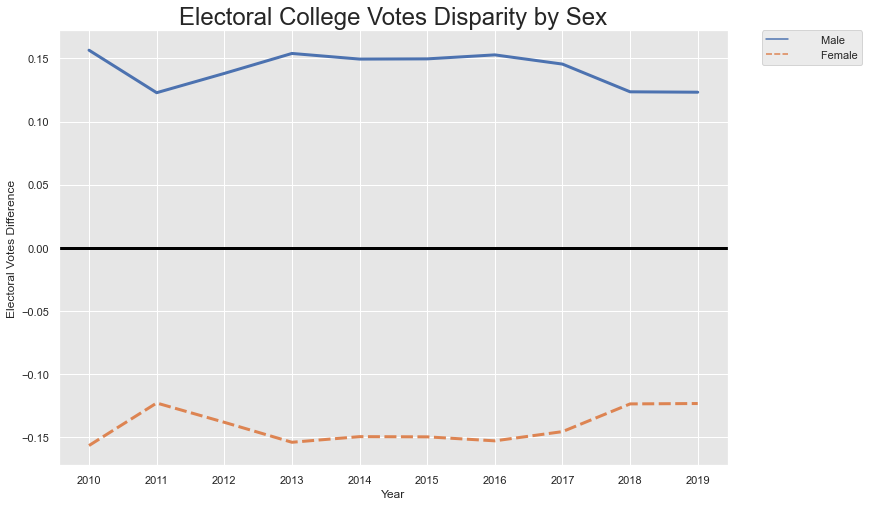

In [3]:
def plotter(temp, plot_topic):
    temp = temp.set_index("Label")
    temp = temp.transpose()

    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background

    g = sns.lineplot(data = temp,linestyle = '-', linewidth = 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + plot_topic, size=24)
    g.set(xlabel='Year', ylabel= "Electoral Votes Difference")
    return g

def gender(data):
    return plotter(data[1:3], "Sex")

def age(data):
    return plotter(data[8:14], "Age")


gender(comp)

In [4]:
sex = comp[1: 3]
sex

,Label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Male,0.156466,0.12281,0.138071,0.153884,0.149419,0.149592,0.152752,0.14546,0.123519,0.123209
2,Female,-0.156466,-0.12281,-0.138071,-0.153884,-0.149419,-0.149592,-0.152752,-0.14546,-0.123519,-0.123209


In [5]:
sex = sex.T
sex.columns = sex.iloc[0]
sex

Label,Male,Female
Label,Male,Female
2010,0.156466,-0.156466
2011,0.12281,-0.12281
2012,0.138071,-0.138071
2013,0.153884,-0.153884
2014,0.149419,-0.149419
2015,0.149592,-0.149592
2016,0.152752,-0.152752
2017,0.14546,-0.14546
2018,0.123519,-0.123519


In [6]:
temp = sex.drop(index="Label")
temp

Label,Male,Female
2010,0.156466,-0.156466
2011,0.12281,-0.12281
2012,0.138071,-0.138071
2013,0.153884,-0.153884
2014,0.149419,-0.149419
2015,0.149592,-0.149592
2016,0.152752,-0.152752
2017,0.14546,-0.14546
2018,0.123519,-0.123519
2019,0.123209,-0.123209


In [12]:
cleaned = pd.DataFrame(
{
    "Year": [*range(10)],
    "Males": temp.iloc[:, 0],
    "Females": temp.iloc[:, 1]
}
)
cleaned

,Year,Males,Females
0,0,0.156466,-0.156466
1,1,0.12281,-0.12281
2,2,0.138071,-0.138071
3,3,0.153884,-0.153884
4,4,0.149419,-0.149419
5,5,0.149592,-0.149592
6,6,0.152752,-0.152752
7,7,0.14546,-0.14546
8,8,0.123519,-0.123519
9,9,0.123209,-0.123209


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

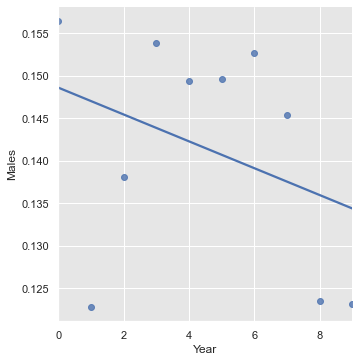

In [16]:
sns.lmplot(x ="Year", y ="Males", data = cleaned, ci = None) 

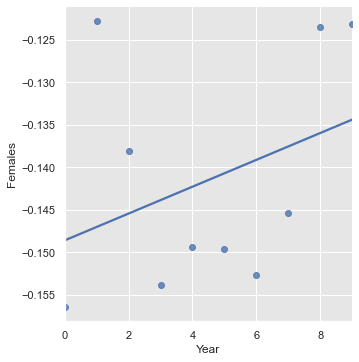

In [17]:
sns.lmplot(x ="Year", y ="Females", data = cleaned, ci = None) 

In [22]:
X = np.array(cleaned.Year).reshape(-1,1)
mal = np.array(cleaned.Males).reshape(-1,1)
fem = np.array(cleaned.Females).reshape(-1,1)

In [37]:
X_train, X_test, male_train, male_test = train_test_split(X, mal, test_size = 0.30)
X_train, X_test, female_train, female_test = train_test_split(X, fem, test_size = 0.30)
female_test

array([[-0.149592029392295],
       [-0.12351947352146908],
       [-0.15388398957384197]], dtype=object)

In [38]:
men = LinearRegression()
women = LinearRegression()

In [39]:
men.fit(X_train, male_train) 
women.fit(X_train, female_train)

LinearRegression()

In [40]:
print(men.score(X_test, male_test)) 
print(women.score(X_test, female_test)) 


-1.9627538844929355
0.19644537654907623


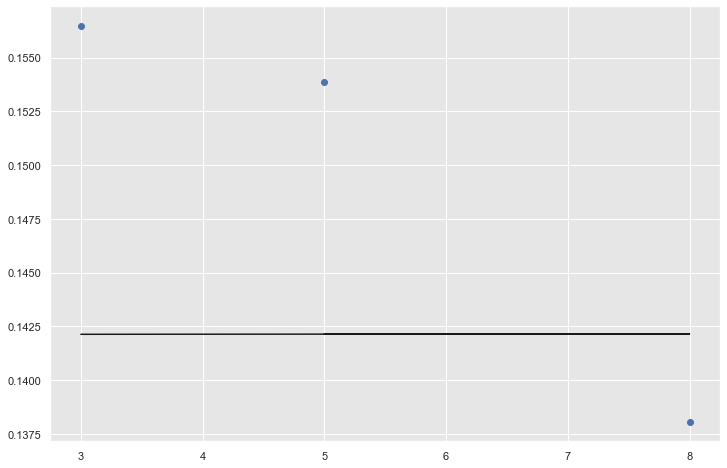

In [41]:
y_pred = men.predict(male_test) 
plt.scatter(X_test, male_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 
# Data scatter of predicted values

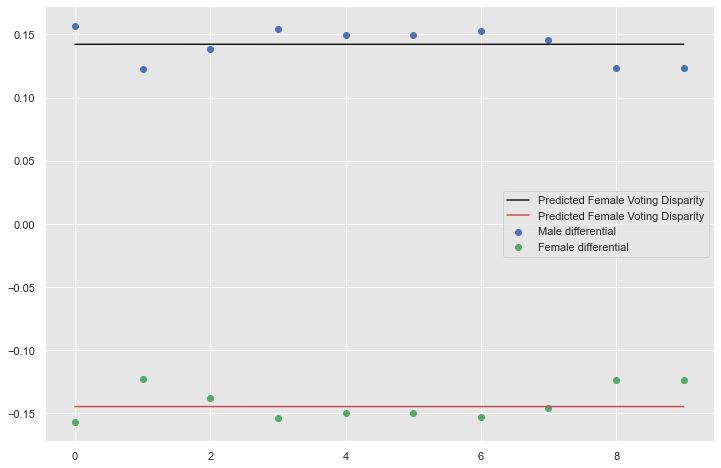

In [51]:
#plotting male and female side by side

#males
plt.scatter(x, mal, color ='b', label = "Male differential") 
plt.plot(x, men.predict(mal), color ='k', label = "Predicted Female Voting Disparity") 

#females
plt.scatter(x, fem, color ='g', label = "Female differential") 
plt.plot(x, women.predict(fem), color ='r', label = "Predicted Female Voting Disparity") 

plt.legend()
plt.show() 
# Data scatter of predicted values